# Popularity based recommender

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def weighted_star_rating(x):
    v = x['review_count']
    R = x['stars']
    return (v/(v+m) * R) + (m/(m+v) * C)

### This recommender takes only the trail popularity as input in order to make trail recommendations. The model does not provide personalized recommendation since it does not take into account individual hiker's information

In [4]:
df = pd.read_csv('csv/combined/CA_trails.csv')

In [5]:
df.stars.describe()

count    1000.000000
mean        4.517500
std         0.187026
min         3.500000
25%         4.500000
50%         4.500000
75%         4.500000
max         5.000000
Name: stars, dtype: float64

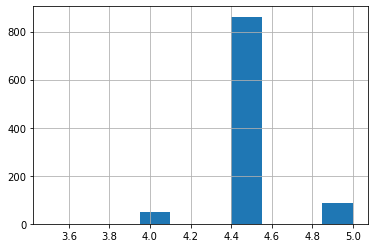

In [15]:
df['stars'].hist(bins=10)

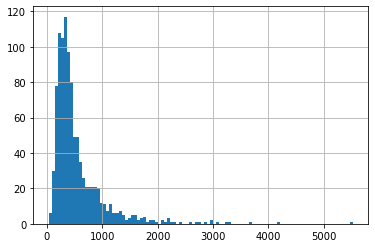

In [7]:
df['review_count'].hist(bins=100)

In [8]:
df['review_count'].describe()

count    1000.000000
mean      541.335000
std       493.952674
min        29.000000
25%       267.750000
50%       392.000000
75%       623.250000
max      5525.000000
Name: review_count, dtype: float64

## Calculating popularity

We need to define minimum number of reviews needed to be listed in the chart. We will use 95% as the threshhold value 

In [9]:
m = df['review_count'].quantile(q=0.95)
C = df['stars'].mean()
print(f'minimum number of review count:     {m}\naverage star rating:                 {C}')

df_Q = df[ df['review_count'] > m]
df_Q['WSR'] = df_Q.apply(weighted_star_rating, axis=1)
df_Q.sort_values('WSR', ascending = False)[:10]

minimum number of review count:     1456.05
average star rating:                 4.5175


<ipython-input-9-30dbabdcf390>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Q['WSR'] = df_Q.apply(weighted_star_rating, axis=1)


,name,stars,review_count,location,elevation,route_type,short_description,long_description,tag_list,n_photos,...,n_completed,state,State,difficulty,short,long,n_tags,distance,duration,WSR
0,Vernal and Nevada Falls via the Mist Trail,5.0,2870,Yosemite National Park,2191.0,Loop,Vernal and Nevada Falls via the Mist Trail is ...,Yosemite National Park charges a fee to enter....,"['Hiking', 'Forest', 'Partially paved', 'River...",7461,...,13298,california,CA,3,260,1,13,8.8,301.0,4.837601
9,Vernal Falls,5.0,2323,Yosemite National Park,1279.0,Out & Back,Vernal Falls is a 4 mile heavily trafficked ou...,Yosemite National Park charges a fee to enter....,"['Kid friendly', 'Hiking', 'Nature trips', 'Wa...",4717,...,8000,california,CA,2,263,1,12,4.0,136.0,4.814095
7,Mount Tallac Trail,5.0,2248,Desolation Wilderness,3330.0,Out & Back,Mount Tallac Trail is a 10.9 mile heavily traf...,There is parking alongside the street. A wilde...,"['Dogs on leash', 'Hiking', 'Nature trips', 'R...",2941,...,4604,california,CA,3,312,1,13,10.9,383.0,4.810331
5,Upper Yosemite Falls Trail,5.0,2222,Yosemite National Park,3231.0,Out & Back,Upper Yosemite Falls Trail is a 7.6 mile heavi...,Yosemite National Park charges a fee to enter....,"['Hiking', 'Bird watching', 'River', 'Views', ...",3219,...,7321,california,CA,3,261,1,10,7.6,270.0,4.808990
10,Half Dome Trail,5.0,1943,Yosemite National Park,5206.0,Out & Back,Half Dome Trail is a 15 mile heavily trafficke...,Yosemite National Park charges a fee to enter....,"['Hiking', 'Nature trips', 'Rock climbing', 'S...",8249,...,6994,california,CA,3,280,1,17,15.0,541.0,4.793312
15,"Dipsea, Steep Ravine, and Matt Davis Loop",5.0,1743,Mount Tamalpais State Park,1702.0,Loop,"Dipsea, Steep Ravine, and Matt Davis Loop is a...",Hike from the Pacific Ocean all the way up to ...,"['Hiking', 'Nature trips', 'Bird watching', 'R...",5050,...,5814,california,CA,2,287,1,12,6.7,221.0,4.780390
20,Icehouse Canyon to Cucamonga Peak Trail,5.0,1703,Cucamonga Wilderness,4314.0,Out & Back,Icehouse Canyon to Cucamonga Peak Trail is a 1...,Day/overnight permits are now required for Cuc...,"['Dogs on leash', 'Backpacking', 'Camping', 'H...",4921,...,4587,california,CA,3,355,1,11,11.6,455.0,4.777609
17,Mount San Antonio and Mount Baldy Notch Trail,5.0,1555,Angeles National Forest,3940.0,Loop,Mount San Antonio and Mount Baldy Notch Trail ...,"A strenuous loop to the 10,068' summit of Bald...","['Dog friendly', 'Hiking', 'Nature trips', 'Sn...",6533,...,5370,california,CA,3,339,1,17,11.5,342.0,4.766678
70,"Lake Chabot: West Shore, Bass Cove, Columbine,...",4.5,1457,Lake Chabot Regional Park,836.0,Loop,"Lake Chabot: West Shore, Bass Cove, Columbine,...",Dogs on leash in developed areas/under voice c...,"['Dogs on leash', 'Kid friendly', 'Backpacking...",2406,...,2645,california,CA,2,369,1,22,9.0,237.0,4.508747
134,Monserate Mountain Trail Loop,4.5,1482,"Fallbrook, California",1381.0,Loop,Monserate Mountain Trail Loop is a 4.1 mile he...,Plenty of parking right off the road.,"['Dogs on leash', 'Hiking', 'Nature trips', 'B...",811,...,1869,california,CA,2,346,1,8,4.1,155.0,4.508673


In [11]:
df_Q['WSR'].describe()

count    50.000000
mean      4.548432
std       0.117174
min       4.234368
25%       4.506643
50%       4.507985
75%       4.508539
max       4.837601
Name: WSR, dtype: float64

In [13]:
df['stars'].describe()

count    1000.000000
mean        4.517500
std         0.187026
min         3.500000
25%         4.500000
50%         4.500000
75%         4.500000
max         5.000000
Name: stars, dtype: float64

## Checking to see if different values of threshhold changes the top 5 list

In [9]:
for i in np.arange(0.70,0.999,0.02):
    m = df['review_count'].quantile(q=i)
    C = df['stars'].mean()
    df_Q = df[ df['review_count'] > m]
    df_Q['WSR'] = df_Q.apply(weighted_star_rating, axis=1)
    print(list(df_Q.sort_values('WSR', ascending = False)[:5].name))

['Vernal and Nevada Falls via the Mist Trail', 'Vernal Falls', 'Mount Tallac Trail', 'Upper Yosemite Falls Trail', 'Half Dome Trail']
['Vernal and Nevada Falls via the Mist Trail', 'Vernal Falls', 'Mount Tallac Trail', 'Upper Yosemite Falls Trail', 'Half Dome Trail']
['Vernal and Nevada Falls via the Mist Trail', 'Vernal Falls', 'Mount Tallac Trail', 'Upper Yosemite Falls Trail', 'Half Dome Trail']
['Vernal and Nevada Falls via the Mist Trail', 'Vernal Falls', 'Mount Tallac Trail', 'Upper Yosemite Falls Trail', 'Half Dome Trail']
['Vernal and Nevada Falls via the Mist Trail', 'Vernal Falls', 'Mount Tallac Trail', 'Upper Yosemite Falls Trail', 'Half Dome Trail']
['Vernal and Nevada Falls via the Mist Trail', 'Vernal Falls', 'Mount Tallac Trail', 'Upper Yosemite Falls Trail', 'Half Dome Trail']
['Vernal and Nevada Falls via the Mist Trail', 'Vernal Falls', 'Mount Tallac Trail', 'Upper Yosemite Falls Trail', 'Half Dome Trail']
['Vernal and Nevada Falls via the Mist Trail', 'Vernal Falls',

<ipython-input-9-8121ed07d6e0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Q['WSR'] = df_Q.apply(weighted_star_rating, axis=1)


## Now we can build a popularity chart for specific regions

In [10]:
region_list = list(df.groupby('location').count().sort_values('name', ascending=False).index)
df_Yosemite = df[df['location']=='Yosemite National Park']

In [11]:
def pop_chart_per_region(region):
    df_region =  df[df['location']==region]
    m = df['review_count'].quantile(q=0.70)
    C = df['stars'].mean()
    df_Q = df_region[ df_region['review_count'] > m]
    df_Q['WSR'] = df_Q.apply(weighted_star_rating, axis=1)
    print(list(df_Q.sort_values('WSR', ascending = False)[:5].name))

In [12]:
for i in range(5):
    print(region_list[i],':')
    pop_chart_per_region(region_list[i])

Yosemite National Park :
['Vernal and Nevada Falls via the Mist Trail', 'Vernal Falls', 'Upper Yosemite Falls Trail', 'Half Dome Trail', 'Four Mile Trail']
Angeles National Forest :
['Mount San Antonio and Mount Baldy Notch Trail', 'Mount San Antonio via Baldy Bowl Trail', 'San Antonio Falls Trail', 'Sunset Peak Trail', 'Bailey Canyon Trail to Jones Peak']
Tahoe National Forest :
['Donner Peak Trail', 'Castle Peak Trail', 'Mount Judah Loop Trail', 'Tahoe Rim Trail to Picnic Rock Viewpoint', 'Loch Leven Lakes Trail']
Golden Gate National Recreation Area :
['Sweeney Ridge Trail via Mori Ridge', 'Rodeo Beach Coastal Trail Loop', 'Mori Point Loop Trail', 'Lands End Trail']
San Bernardino National Forest :
['Bertha Peak Trail', 'Bear Lake Woodland Trail', 'Cougar Crest Trail ', 'Castle Rock Trail', 'Pine Knot Trail to Grand View Point']


<ipython-input-11-5fbe56736ff9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Q['WSR'] = df_Q.apply(weighted_star_rating, axis=1)


## Build a popularity chart for specific difficulty level

In [13]:
def pop_chart_per_difficulty(difficulty, quantile=0.95):
    df_region =  df[df['difficulty']==difficulty]
    m = df['review_count'].quantile(q=quantile)
    C = df['stars'].mean()
    df_Q = df_region[ df_region['review_count'] > m]
    df_Q['WSR'] = df_Q.apply(weighted_star_rating, axis=1)
    return df_Q.sort_values('WSR', ascending = False)

## Top popular hikes among 'difficult' hikes

In [14]:
top_difficult = pop_chart_per_difficulty(3, 0.80)
top_difficult[{'name',  'WSR', 'stars', 'review_count', 'location','elevation','distance', 'duration', 'route_type'}][:5]

<ipython-input-13-138d2a1b9930>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Q['WSR'] = df_Q.apply(weighted_star_rating, axis=1)


,duration,route_type,location,name,distance,elevation,review_count,stars,WSR
0,301.0,Loop,Yosemite National Park,Vernal and Nevada Falls via the Mist Trail,8.8,2191.0,2870,5.0,4.795676
7,383.0,Out & Back,Desolation Wilderness,Mount Tallac Trail,10.9,3330.0,2248,5.0,4.766500
5,270.0,Out & Back,Yosemite National Park,Upper Yosemite Falls Trail,7.6,3231.0,2222,5.0,4.765098
10,541.0,Out & Back,Yosemite National Park,Half Dome Trail,15.0,5206.0,1943,5.0,4.748920
20,455.0,Out & Back,Cucamonga Wilderness,Icehouse Canyon to Cucamonga Peak Trail,11.6,4314.0,1703,5.0,4.733109


## Top popular hikes among 'moderate' hikes

In [15]:
moderate_difficult = pop_chart_per_difficulty(2, 0.80)
moderate_difficult[{'name',  'WSR', 'stars', 'review_count', 'location','elevation','distance', 'duration', 'route_type'}][:5]

<ipython-input-13-138d2a1b9930>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Q['WSR'] = df_Q.apply(weighted_star_rating, axis=1)


,duration,route_type,location,name,distance,elevation,review_count,stars,WSR
9,136.0,Out & Back,Yosemite National Park,Vernal Falls,4.0,1279.0,2323,5.0,4.770452
15,221.0,Loop,Mount Tamalpais State Park,"Dipsea, Steep Ravine, and Matt Davis Loop",6.7,1702.0,1743,5.0,4.735881
46,192.0,Loop,Point Lobos State Natural Reserve,Point Lobos Loop Trail,6.7,741.0,1036,5.0,4.676489
88,250.0,Loop,Mount Tamalpais State Park,Dipsea Steep Ravine Matt Davis Loop Trail from...,7.4,1748.0,1004,5.0,4.673162
38,490.0,Out & Back,D. L. Bliss State Park,Rubicon Trail,16.4,2306.0,962,5.0,4.668691
